In [1]:
# Imports from the Python standard library
from io import StringIO
from typing import Iterable

# Imports from the comp chem ecosystem
import numpy as np
from openff.units import Quantity, unit
from openmm import unit as openmm_unit
#from pdbfixer import PDBFixer

# New topology imports
from openff.interchange import Interchange

# Imports from the toolkit
from openff.toolkit import ForceField, Molecule, Topology

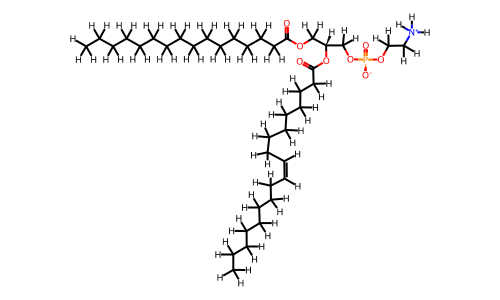

In [2]:
# Load a molecule from a SDF file
POPE = Molecule.from_file("POPE.sdf")
POPE.visualize()

In [3]:
topology = Topology.from_molecules(
    [POPE]
)
topology

In [4]:
forcefield = ForceField("openff-2.1.0.offxml")
forcefield

In [5]:
from openff.interchange import Interchange

interchange = Interchange.from_smirnoff(
    force_field=forcefield,
    topology=topology,
)
interchange

/Users/patrickfrankel/anaconda3/envs/openff/lib/python3.11/site-packages/openff/interchange/smirnoff/_create.py:237: UserWarning: Automatically down-converting BondHandler from version 0.4 to 0.3. In the future, this down-conversion will not happen and verison 0.3 will not be supported.
  _downconvert_vdw_handler(force_field["vdW"])


Interchange with 7 collections, non-periodic topology with 125 atoms.

In [6]:
# Export GROMACS files.
interchange.to_top("POPE.top")
interchange.to_gro("POPE.gro")

/Users/patrickfrankel/anaconda3/envs/openff/lib/python3.11/site-packages/openff/interchange/interop/gromacs/export/_export.py:46: UserWarning: WARNING: System defined with no box vectors, which GROMACS does not offically support in versions 2020 or newer (see https://gitlab.com/gromacs/gromacs/-/issues/3526). Setting box vectors to a 5  nm cube.
  self._write_gro(gro, decimal)
